In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,root_mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [15]:
df = pd.read_csv('anemia_dataset.csv')
df.head()


#class\t - accetable or unacceptable 

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia


In [16]:
df.isnull().sum()

WBC          0
LYMp         0
NEUTp        0
LYMn         0
NEUTn        0
RBC          0
HGB          0
HCT          0
MCV          0
MCH          0
MCHC         0
PLT          0
PDW          0
PCT          0
Diagnosis    0
dtype: int64

In [17]:
le = LabelEncoder()
df['Diagnosis'] = le.fit_transform(df['Diagnosis'])


In [18]:
x = df[['RBC','HGB','HCT','MCV','MCH','MCHC']]
y = df['Diagnosis']

x_train , x_test , y_train , y_test = train_test_split(x, y , test_size=0.2,random_state=42)

model = KNeighborsClassifier(n_neighbors=9)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print(" KNN accuracy score: ",accuracy_score(y_test,y_pred))
print("confusion matrix: \n",confusion_matrix(y_test,y_pred))
print("root mean square: \n",root_mean_squared_error(y_test,y_pred))

 KNN accuracy score:  0.77431906614786
confusion matrix: 
 [[68  2  1  0  1  1  1  0  7]
 [ 0 31  0  0  0  1  0  2  0]
 [ 3  0  0  0  0  0  0  0  2]
 [ 2  0  0  0  0  0  0  0  1]
 [ 1  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0 49  6  0  0]
 [ 1  0  0  0  0  9 36  0  0]
 [ 0  2  0  0  0  0  0 12  0]
 [11  0  1  0  1  0  1  0  3]]
root mean square: 
 2.5491281793405705


In [19]:

model1 = LogisticRegression()
model1.fit(x_train,y_train)

y_pred1 = model1.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,y_pred1))
print("confusion matrix: \n",confusion_matrix(y_test,y_pred1))
print("root mean square: \n",root_mean_squared_error(y_test,y_pred1))

accuracy score:  0.6381322957198443
confusion matrix: 
 [[77  1  0  0  0  1  1  1  0]
 [ 0 27  0  0  0  2  3  0  2]
 [ 5  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0]
 [13  2  0  0  0 23 18  0  0]
 [ 5  0  0  0  0  6 34  1  0]
 [ 0  0  0  0  0  0 11  3  0]
 [13  0  0  0  0  1  1  2  0]]
root mean square: 
 2.6346981309526023


d:\Machine Learning\machine\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:

model2 = RandomForestClassifier(n_estimators=100,random_state=42)
model2.fit(x_train,y_train)

y_pred2 = model2.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,y_pred2))
print("confusion matrix:\n ",confusion_matrix(y_test,y_pred2))
print("root mean square: \n",root_mean_squared_error(y_test,y_pred2))

accuracy score:  0.8715953307392996
confusion matrix:
  [[69  0  8  0  0  0  0  0  4]
 [ 0 34  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  2]
 [ 1  0  1  0  0  0  0  0  1]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0 56  0  0  0]
 [ 0  0  0  0  0  0 45  0  1]
 [ 0  0  0  0  0  0  0 14  0]
 [ 8  0  4  0  0  0  0  0  5]]
root mean square: 
 2.037584592786922


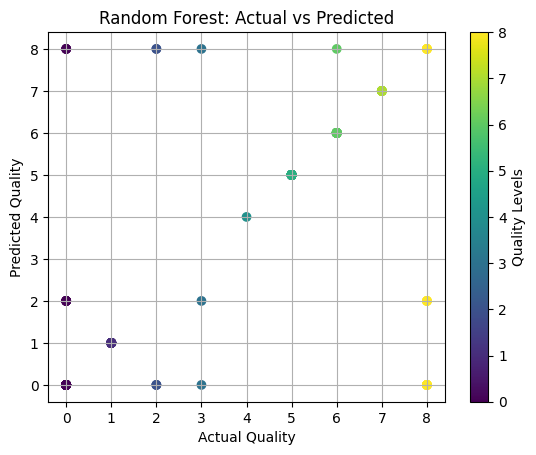

In [21]:
plt.scatter(y_test,y_pred2,c=y_test,cmap='viridis')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Random Forest: Actual vs Predicted")
plt.colorbar(label="Quality Levels")
plt.grid()
plt.show()

In [22]:

model3 = DecisionTreeClassifier()
model3.fit(x_train,y_train)

y_pred3 = model3.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,y_pred3))
print("confusion matrix:\n ",confusion_matrix(y_test,y_pred3))
print("root mean square: \n",root_mean_squared_error(y_test,y_pred3))


accuracy score:  0.8560311284046692
confusion matrix:
  [[65  0  8  1  0  0  0  0  7]
 [ 0 34  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  1]
 [ 1  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0 56  0  0  0]
 [ 0  0  0  0  0  0 45  0  1]
 [ 0  0  0  0  0  0  0 14  0]
 [ 7  0  3  2  0  0  0  0  5]]
root mean square: 
 2.169832068669297


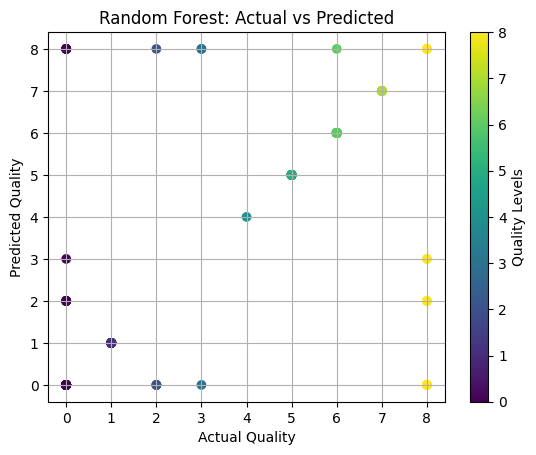

In [23]:
plt.scatter(y_test,y_pred3,c=y_test,cmap='viridis')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Random Forest: Actual vs Predicted")
plt.colorbar(label="Quality Levels")
plt.grid()
plt.show()

In [24]:
df.head()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,5
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,5
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,1
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,1
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,5


In [25]:
#x = df[['RBC','HGB','HCT','MCV','MCH','MCHC']]
new = [[2.79,8.3,28.5,88.5,27.3,31.3]]
new_data = model.predict(new)
print("Diagnosis:",new_data)

Diagnosis: [5]


d:\Machine Learning\machine\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
